<a href="https://colab.research.google.com/github/laHermes/linear_regression_insurance_tensorflow/blob/main/personal_medical_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PERSONAL MEDICAL INSURANCE**

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# get data
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance_hot = pd.get_dummies(insurance)

In [ ]:
# create X and y values (features & labels)
X = insurance_hot.drop("charges", axis=1)
y = insurance_hot["charges"]

In [ ]:
 # creating training and test sets
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# model creation
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
])

# callback function
callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=10);

# model compilation
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['mae'])

# model fitting
history = model.fit(X_train, y_train, epochs=200, verbose=0, callbacks=[callback])

In [ ]:
# model evaluation
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3228.3655 - mae: 3228.3655


[3228.365478515625, 3228.365478515625]

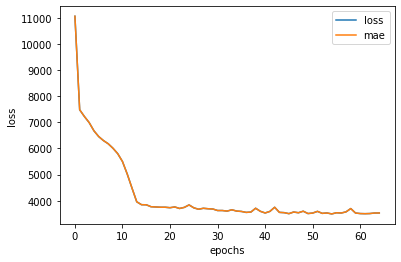

In [ ]:
# visualising loss curve
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()